Importing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

Load a predefined dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

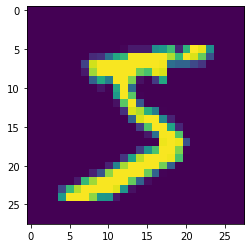

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Defining a function for image processing

In [6]:
def preprocess_images(images):
  images = images / 255
  return images
X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dense(10))
model.add(Softmax())
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [10]:
cp = ModelCheckpoint('model', save_best_only=True)
history_cp=tf.keras.callbacks.CSVLogger('history.csv', separator=",", append=False)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, callbacks=[cp, history_cp])

Epoch 1/8
1870/1875 [============================>.] - ETA: 0s - loss: 0.3570 - accuracy: 0.8997

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3569 - accuracy: 0.8998 - val_loss: 0.2222 - val_accuracy: 0.9360
Epoch 2/8
1865/1875 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9418

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2030 - accuracy: 0.9418 - val_loss: 0.1800 - val_accuracy: 0.9459
Epoch 3/8
1875/1875 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9511

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1699 - accuracy: 0.9511 - val_loss: 0.1606 - val_accuracy: 0.9546
Epoch 4/8
1872/1875 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9577

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1472 - accuracy: 0.9577 - val_loss: 0.1501 - val_accuracy: 0.9579
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.9619 - val_loss: 0.1512 - val_accuracy: 0.9570
Epoch 6/8
1853/1875 [============================>.] - ETA: 0s - loss: 0.1229 - accuracy: 0.9654

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1232 - accuracy: 0.9654 - val_loss: 0.1383 - val_accuracy: 0.9616
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9675 - val_loss: 0.1444 - val_accuracy: 0.9614
Epoch 8/8
1865/1875 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9694

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1071 - accuracy: 0.9694 - val_loss: 0.1341 - val_accuracy: 0.9633


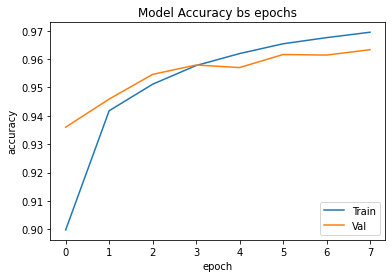

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
    
history = pd.read_csv('history.csv')
fig = plt.figure()
plt.plot(history['epoch'], history['accuracy'] )
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Model Accuracy bs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()